In [1]:
import selenium
import pandas as pd
import time
import  requests
from  bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

# Reviews from Flipkart

In [5]:
driver = webdriver.Chrome(r"C:\Users\NITIN GUPTA\Downloads\chromedriver_win32\chromedriver.exe")

C:\Users\NITIN GUPTA\AppData\Local\Temp\ipykernel_10144\111446073.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\NITIN GUPTA\Downloads\chromedriver_win32\chromedriver.exe")


In [6]:
driver.get('https://www.flipkart.com/')

In [7]:
cross= driver.find_element_by_xpath('/html/body/div[2]/div/div/button')
cross.click()

C:\Users\NITIN GUPTA\AppData\Local\Temp\ipykernel_10144\3615083400.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  cross= driver.find_element_by_xpath('/html/body/div[2]/div/div/button')


In [9]:
srch_items = ['laptops', 'Phones','smart watches','Monitors']
title = []
review_text = []
ratings = []

In [10]:
def scrap():    
        for i in driver.find_elements_by_xpath("//div[@class='t-ZTKy']"):
            review_text.append(i.text)
        for i in driver.find_elements_by_xpath("//p[@class='_2-N8zT']"):
            title.append(i.text)
        for i in driver.find_elements_by_xpath("//p[@class='_2-N8zT']/../div"):
            ratings.append(i.text)
        return

In [11]:
urls=[]
for i in srch_items:
    # Find the search bar
    srchBar = driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
    srchBar.clear()
    srchBar.send_keys(i)
    # Clicking on the search button
    driver.find_element_by_xpath("//button[@class='L0Z3Pu']").click()
    time.sleep(3)
    page = []
    for i in driver.find_elements_by_xpath("//nav[@class='yFHi8N']/a"):
        page.append(i.get_attribute('href'))
    for i in page[0:4]:
        driver.get(i)
        time.sleep(3)
        items = driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
        for i in items:
            urls.append(i.get_attribute('href'))
len(urls)    

C:\Users\NITIN GUPTA\AppData\Local\Temp\ipykernel_10144\1229878325.py:4: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  srchBar = driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
C:\Users\NITIN GUPTA\AppData\Local\Temp\ipykernel_10144\1229878325.py:8: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath("//button[@class='L0Z3Pu']").click()
C:\Users\NITIN GUPTA\AppData\Local\Temp\ipykernel_10144\1229878325.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  for i in driver.find_elements_by_xpath("//nav[@class='yFHi8N']/a"):
C:\Users\NITIN GUPTA\AppData\Local\Temp\ipykernel_10144\1229878325.py:16: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  items = driver.find_elements

192

In [12]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    for _ in range(2):
        driver.execute_script("window.scrollBy(0,6000)")
        time.sleep(1)
    # Clicking on all reviews
    try:
        btn=driver.find_element_by_xpath("//div[@class='_2c2kV-']/following::a")
        lnk = btn.get_attribute('href')
        driver.get(lnk)
        time.sleep(1)
    except NoSuchElementException:
        pass

    scrap()        
    try:
        n_page=driver.find_elements_by_xpath("//nav[@class='yFHi8N']/a")
        np=[]
        for i in n_page:
            np.append(i.get_attribute('href'))
        for i in np[0:18]:
            driver.get(i)
            time.sleep(1)
            scrap()
    except: continue
len(ratings), len(review_text), len(title)   

C:\Users\NITIN GUPTA\AppData\Local\Temp\ipykernel_10144\2901722667.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  btn=driver.find_element_by_xpath("//div[@class='_2c2kV-']/following::a")
C:\Users\NITIN GUPTA\AppData\Local\Temp\ipykernel_10144\2176095201.py:2: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  for i in driver.find_elements_by_xpath("//div[@class='t-ZTKy']"):
C:\Users\NITIN GUPTA\AppData\Local\Temp\ipykernel_10144\2176095201.py:4: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  for i in driver.find_elements_by_xpath("//p[@class='_2-N8zT']"):
C:\Users\NITIN GUPTA\AppData\Local\Temp\ipykernel_10144\2176095201.py:6: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  for i in driver.find_elements_

(16111, 16111, 16111)

In [13]:
data = list(zip(title,review_text,ratings))
df = pd.DataFrame(data, columns = ["Review_title","Review_text","Ratings"])
df

,Review_title,Review_text,Ratings
0,Must buy!,very good product. I am using to clean my lapt...,5
1,Mind-blowing purchase,"super product by Ranz,\ni couldn't expect this...",5
2,Slightly disappointed,The design element of the element is flawed. B...,2
3,Classy product,Best product\nCloth fabric is good.\nCleaning ...,5
4,Does the job,Good product.... But the wipe given in it is s...,3
...,...,...,...
16106,Just wow!,After 2 weeks I'm using this mobile\nBattery 🔋...,5
16107,Highly recommended,Awsome,5
16108,Wonderful,Back camera is good...but front camera is ok,5
16109,Good quality product,Superb midrange phone..✌️\nNo lag after 9 days...,4


In [14]:
df.to_csv(r"C:\Users\NITIN GUPTA\reviews.csv")

In [15]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r"C:\Users\NITIN GUPTA\reviews.csv")
df

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Must buy!,very good product. I am using to clean my lapt...,5
1,1,Mind-blowing purchase,"super product by Ranz,\ni couldn't expect this...",5
2,2,Slightly disappointed,The design element of the element is flawed. B...,2
3,3,Classy product,Best product\nCloth fabric is good.\nCleaning ...,5
4,4,Does the job,Good product.... But the wipe given in it is s...,3
...,...,...,...,...
16106,16106,Just wow!,After 2 weeks I'm using this mobile\nBattery 🔋...,5
16107,16107,Highly recommended,Awsome,5
16108,16108,Wonderful,Back camera is good...but front camera is ok,5
16109,16109,Good quality product,Superb midrange phone..✌️\nNo lag after 9 days...,4


In [18]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

# Data analysis

In [19]:
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(5)

We have 16111 Rows and 3 Columns in our dataframe


,Review_title,Review_text,Ratings
0,Must buy!,very good product. I am using to clean my lapt...,5
1,Mind-blowing purchase,"super product by Ranz,\ni couldn't expect this...",5
2,Slightly disappointed,The design element of the element is flawed. B...,2
3,Classy product,Best product\nCloth fabric is good.\nCleaning ...,5
4,Does the job,Good product.... But the wipe given in it is s...,3


In [20]:
df.isna().sum()

Review_title     0
Review_text     12
Ratings          0
dtype: int64

In [21]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 16111 Rows and 3 Columns in our dataframe before removing NaN
We have 16099 Rows and 3 Columns in our dataframe after removing NaN


In [22]:
df.isna().sum()

Review_title    0
Review_text     0
Ratings         0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16099 entries, 0 to 16110
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  16099 non-null  object
 1   Review_text   16099 non-null  object
 2   Ratings       16099 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 503.1+ KB


As pr above details we have found total not null values.

In [24]:
df['Ratings'].unique()

array([5, 2, 3, 4, 1], dtype=int64)

In [25]:
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,Must buy!,very good product. I am using to clean my lapt...,5,Must buy! very good product. I am using to cle...
1,Mind-blowing purchase,"super product by Ranz,\ni couldn't expect this...",5,"Mind-blowing purchase super product by Ranz,\n..."
2,Slightly disappointed,The design element of the element is flawed. B...,2,Slightly disappointed The design element of th...
3,Classy product,Best product\nCloth fabric is good.\nCleaning ...,5,Classy product Best product\nCloth fabric is g...
4,Does the job,Good product.... But the wipe given in it is s...,3,Does the job Good product.... But the wipe giv...
...,...,...,...,...
16106,Just wow!,After 2 weeks I'm using this mobile\nBattery 🔋...,5,Just wow! After 2 weeks I'm using this mobile\...
16107,Highly recommended,Awsome,5,Highly recommended Awsome
16108,Wonderful,Back camera is good...but front camera is ok,5,Wonderful Back camera is good...but front came...
16109,Good quality product,Superb midrange phone..✌️\nNo lag after 9 days...,4,Good quality product Superb midrange phone..✌️...


In [26]:
# We have combined review Title with review text

In [27]:
df['Review'][0]

"Must buy! very good product. I am using to clean my laptop,tv, mobile. wow it's cleaning superb"

In [28]:
df['Review'][7]

'Mind-blowing purchase Very good product'

# Text Processing

In [29]:
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [30]:
# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

# Removing Stopwords

In [31]:
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [32]:
df['Review'][0]

'must buy good product using clean laptoptv mobile wow cleaning superb'

In [33]:
df['Review'][7]

'mindblowing purchase good product'

In [36]:
df['Review'][210]

'job okay'

# Lemmatization

In [38]:
lemmatizer = WordNetLemmatizer()

In [42]:
from tqdm  import tqdm
Review = []
for sentance in tqdm(df['Review'].values):
    sent = decontracted(sentance)
    sent =' '.join(lemmatizer.lemmatize(e) for e in sent.split())
    Review.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 16099/16099 [00:01<00:00, 10706.34it/s]


In [43]:
df['Review'] = Review

# Text Normalization

In [44]:
def norm_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : norm_words(x))

In [45]:
df['Review'][0]

'must buy good product using clean laptoptv mobile wow cleaning superb'

In [46]:
df['Review'][210]

'job okay'

In [47]:
df['Review'][7]

'mindblowing purchase good product'

Words Count

In [48]:
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head(10)

,Review_WC,Review
0,11,must buy good product using clean laptoptv mob...
1,21,mindblowing purchase super product ranz could ...
2,14,slightly disappointed design element element f...
3,24,classy product best product cloth fabric good ...
4,15,job good product wipe given small size still w...
5,9,terrific nice product easy use easy clean affo...
6,11,super good one spray screen directly spray clo...
7,4,mindblowing purchase good product
8,2,good good
9,6,classy product great product clean tv


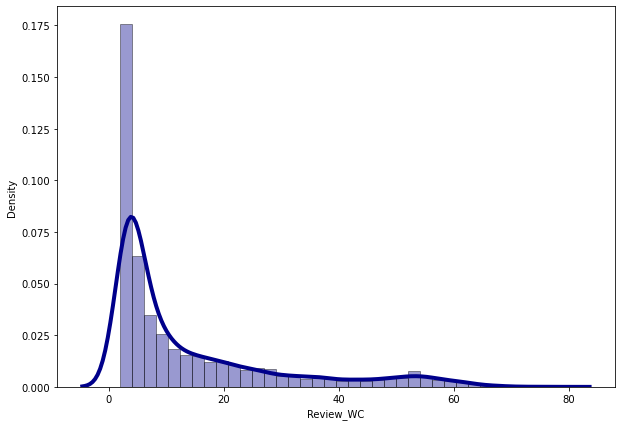

In [49]:
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

As per above visualization it is clear that most of the words in reviews are 0 to 20

Character count

In [50]:
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head(10)

,Review_CC,Review
0,69,must buy good product using clean laptoptv mob...
1,140,mindblowing purchase super product ranz could ...
2,99,slightly disappointed design element element f...
3,154,classy product best product cloth fabric good ...
4,79,job good product wipe given small size still w...
5,58,terrific nice product easy use easy clean affo...
6,65,super good one spray screen directly spray clo...
7,33,mindblowing purchase good product
8,9,good good
9,37,classy product great product clean tv


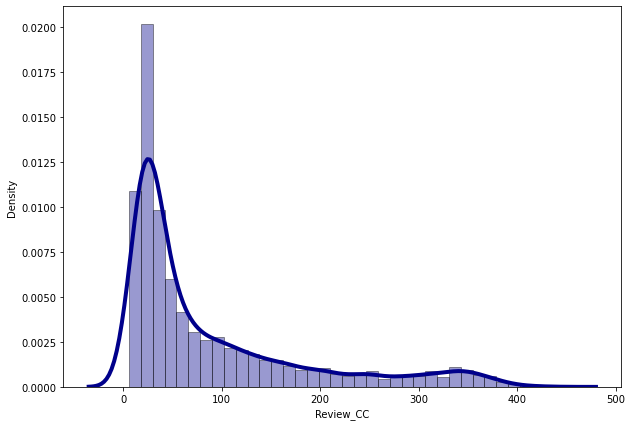

In [51]:
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

# Removing Outliers

In [53]:
from scipy.stats import zscore
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 15858 Rows and 6 Columns in our dataframe after removing outliers


# After Removing Outliers

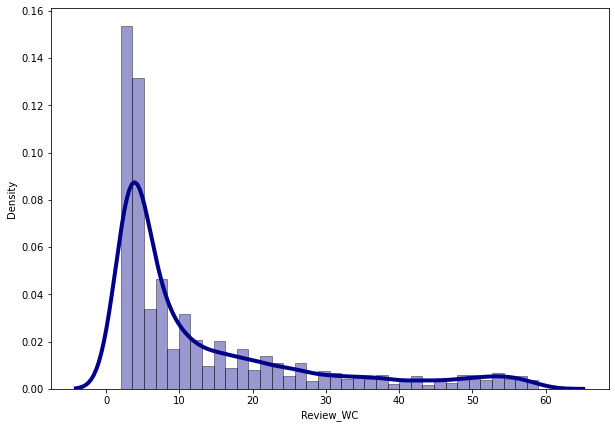

In [54]:
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

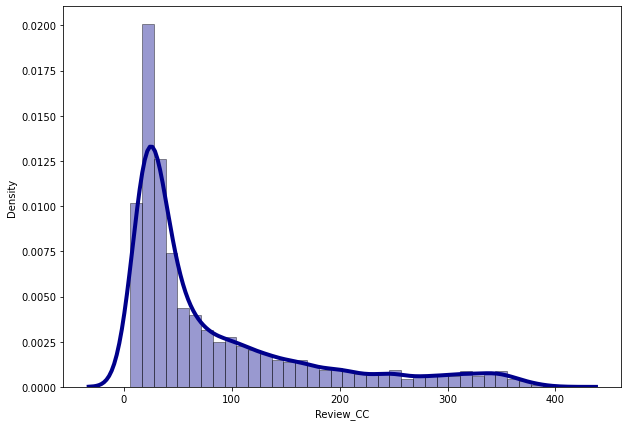

In [55]:
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

# Visualization for rating Column

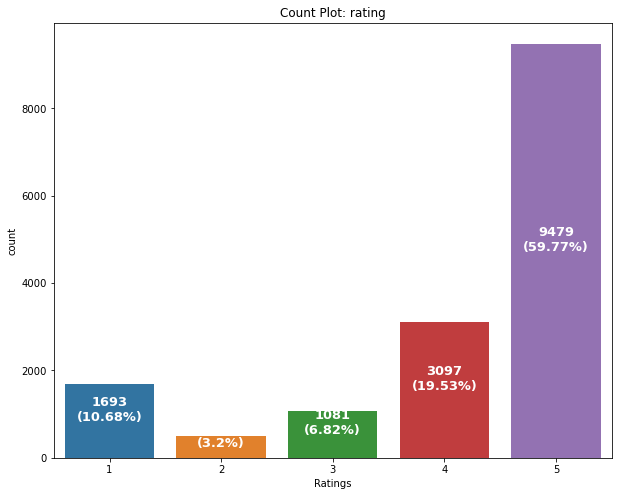

In [56]:
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

- We can see that the highest number of customer rating received are for 5 stars
- Then we have 4 star rating reviews present in our dataset
- However we see a high 1 star rating as well compared to 2 and 3 star rating reviews

# Checking review word count distribution for each rating

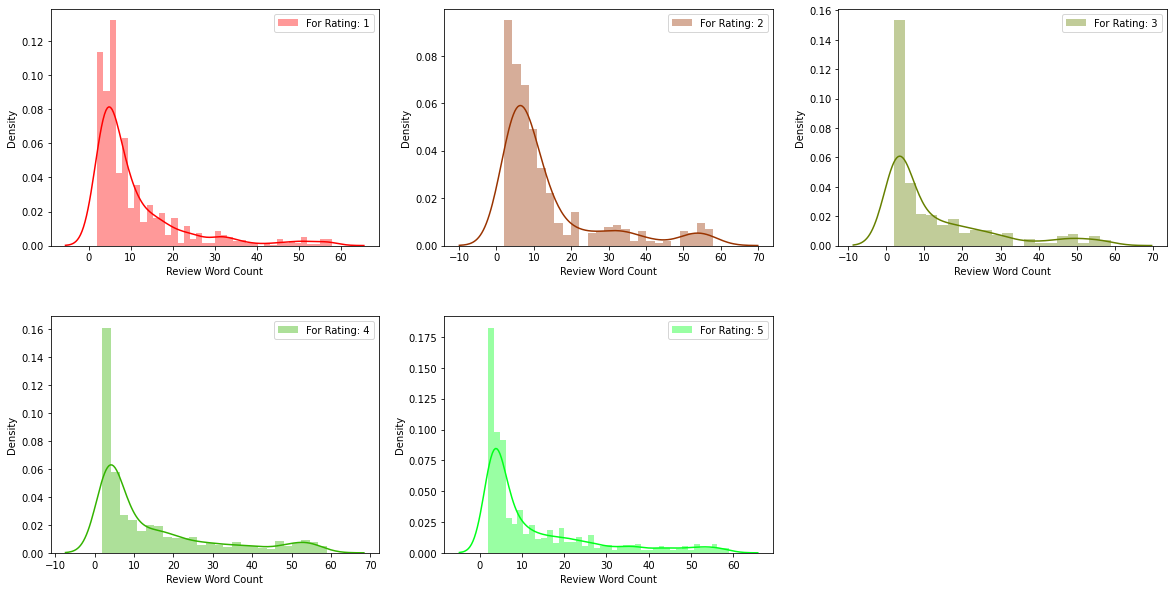

In [57]:
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

# Checking review character count distribution for each rating

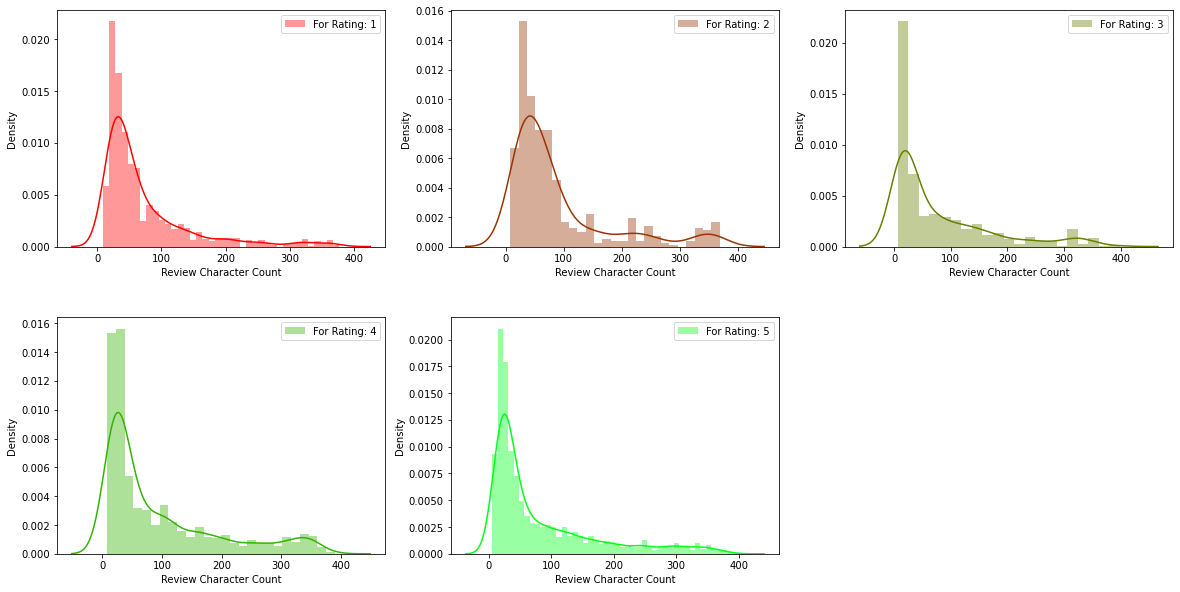

In [58]:
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

# Displaying loud words with Word Cloud information

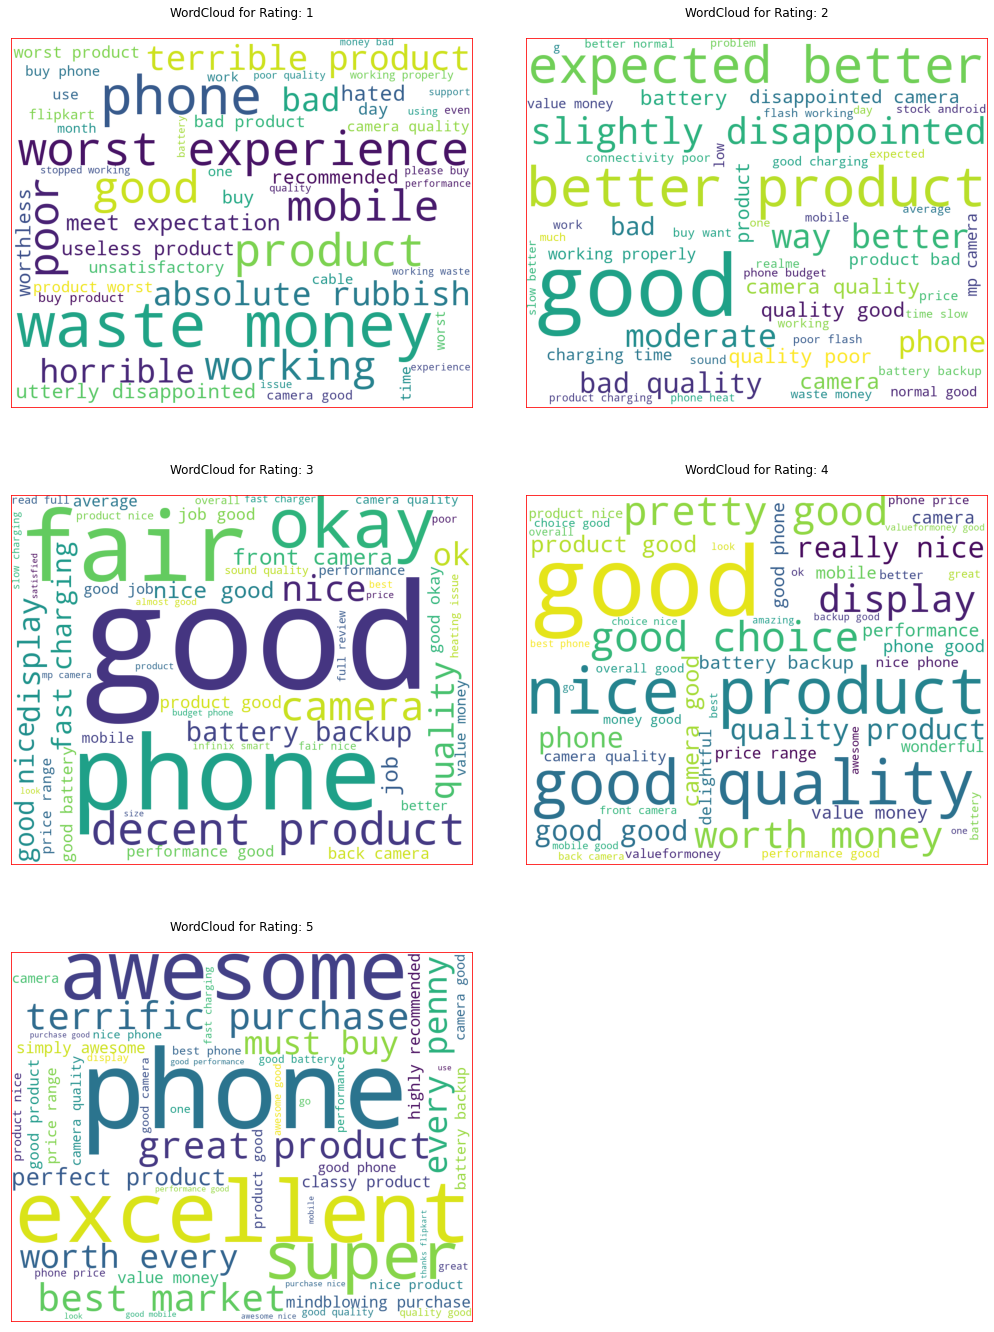

In [64]:
from wordcloud import WordCloud
cols = 2
ratings = np.sort(df.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(df.Review[df.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

5    9479
4    3097
1    1693
3    1081
2     508
Name: Ratings, dtype: int64


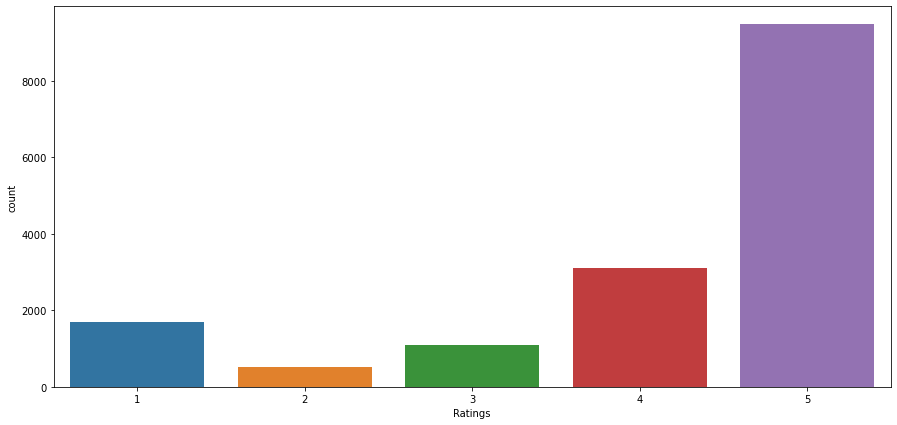

In [65]:
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

- Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star.
- Which will cause the **Imbalance** problem for our Machine Learning model and make it bias.
- So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
- For that first I will shuffle the dataset so that we can select data from  Flipkart
- Then I will select equal number of data of every category and ensure that the rating values are balanced

In [66]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Simply awesome,"Best buy in this price range, lovely back up, ...",5,simply awesome best buy price range lovely bac...,50,325
1,Super!,low budget good phone,5,super low budget good phone,5,27
2,Super!,Nice,5,super nice,2,10
3,Waste of money!,Not working when I used..spec is good.. but qu...,1,waste money working usedspec good quality work...,9,64
4,Nice product,PHONE IS GOOD AS PER THE PRICE.\nCAMERA IS QUI...,4,nice product phone good per price camera quite...,53,315
...,...,...,...,...,...,...
15853,Mind-blowing purchase,Amazing product worth of its price and 1st tim...,5,mindblowing purchase amazing product worth pri...,54,371
15854,Brilliant,Vary good,5,brilliant vary good,3,19
15855,Brilliant,cable is properly working..,5,brilliant cable properly working,4,32
15856,Highly recommended,nice phone best camera 📸,5,highly recommended nice phone best camera,6,41


In [67]:
df1 = df[df['Ratings']==1][0:508]
df2 = df[df['Ratings']==2][0:508]
df3 = df[df['Ratings']==3][0:508]
df4 = df[df['Ratings']==4][0:508]
df5 = df[df['Ratings']==5][0:508]

df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Very poor,Stopped working in 15 days..,1,poor stopped working day,5,25
1,Nice,"The keyboard is compact, moderately heavy, pre...",3,nice keyboard compact moderately heavy pretty ...,28,188
2,Bad quality,Sometimes I apologize why I am buying this pro...,2,bad quality sometimes apologize buying product...,7,56
3,Fair,Chinese set 🤐\nDon't buy Chinese phone go for ...,3,fair chinese set buy chinese phone go motorola...,19,119
4,Best in the market!,"Great Product, I was afraid to buy this as it ...",5,best market great product afraid buy launching...,12,79
...,...,...,...,...,...,...
2535,Nice product,"Nice product, best phone in this price",4,nice product nice product best phone price,7,42
2536,Slightly disappointed,Bottle were not in good condition also cleanin...,2,slightly disappointed bottle good condition al...,11,87
2537,Fair,It is not fast charging mobile.and sound is al...,3,fair fast charging mobileand sound also good c...,15,93
2538,Excellent,Nice 👍👍👍,5,excellent nice,2,14


1    508
3    508
2    508
5    508
4    508
Name: Ratings, dtype: int64


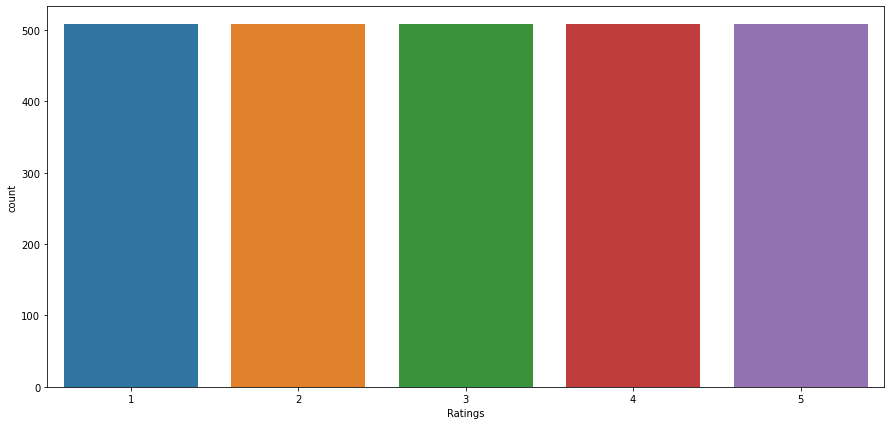

In [68]:
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Now all ratings has equal numer of data.

# Model Building

In [69]:
x = df['Review']
y = df['Ratings']

# Converting text into datausing TFID vectorization

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

In [79]:
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = 42)

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (1778, 79187)
x_test (762, 79187)
y_train (1778,)
y_test (762,)


In [80]:
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()

In [81]:
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

In [82]:
for model in [lr,svc,bnb,mnb,sgd,rf,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 92.51968503937007
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.93      0.95      0.94       150
           2       0.99      0.94      0.96       159
           3       0.89      0.96      0.92       140
           4       0.94      0.84      0.88       164
           5       0.89      0.95      0.92       149

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.92       762

CONFUSION MATRIX: 
 [[143   2   2   0   3]
 [  2 150   6   1   0]
 [  4   0 134   1   1]
 [  4   0   9 137  14]
 [  1   0   0   7 141]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURACY SCORE PERCENTAGE: 93.70

# Cross Validation for Model

In [83]:
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,sgd,rf,lgb]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score: 93.03177301243065


******************************LinearSVC******************************
Cross validation score: 94.17361419295656


******************************SGDClassifier******************************
Cross validation score: 93.78006834486526


******************************RandomForestClassifier******************************
Cross validation score: 92.24403005834341


******************************LGBMClassifier******************************
Cross validation score: 93.50416758540551




# Hyperparameter Tuning

In [90]:
grid_params = {'C': [0.1, 1, 10, 100, 1000], 
              'penalty':['l1', 'l2'],
              'loss': ['hinge','squared_hinge']}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(svc, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END .......C=0.1, loss=hinge, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .......C=0.1, loss=hinge, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .......C=0.1, loss=hinge, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END .....C=0.1, loss=hinge, penalty=l2;, score=0.931 total time=   0.0s
[CV 2/3] END .....C=0.1, loss=hinge, penalty=l2;, score=0.899 total time=   0.1s
[CV 3/3] END .....C=0.1, loss=hinge, penalty=l2;, score=0.912 total time=   0.1s
[CV 1/3] END C=0.1, loss=squared_hinge, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END C=0.1, loss=squared_hinge, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END C=0.1, loss=squared_hinge, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END C=0.1, loss=squared_hinge, penalty=l2;, score=0.922 total time=   0.0s
[CV 2/3] END C=0.1, loss=squared_hinge, penalty=l2;, score=0.909 total time=   0.0s
[CV 3/3] END C=0.1, loss=squared_hinge,

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [91]:
GSCV.best_params_

{'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [93]:
best_model = LinearSVC(C=10, loss="squared_hinge", penalty='l2')
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 93.30708661417323

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.95      0.95      0.95       150
           2       0.97      0.96      0.96       159
           3       0.91      0.95      0.93       140
           4       0.93      0.85      0.89       164
           5       0.91      0.96      0.93       149

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762


CONFUSION MATRIX: 
 [[143   4   1   0   2]
 [  2 152   3   2   0]
 [  2   1 133   3   1]
 [  3   0   9 140  12]
 [  0   0   0   6 143]]


# Saving Model

In [109]:
import joblib

In [110]:
joblib.dump(best_model, "Rating_Model.pkl")

['Rating_Model.pkl']

# Loading the Best Model

In [112]:
Model = joblib.load("Rating_Model.pkl")
result = Model.score(x_test, y_test)*100
print(result)

93.30708661417323


In [113]:
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
results = pd.DataFrame()
results['Predicted Review Ratings'] = prediction
results['Actual Review Ratings'] = y
results

,Predicted Review Ratings,Actual Review Ratings
0,2,1
1,1,3
2,1,2
3,2,3
4,5,5
...,...,...
757,5,2
758,5,1
759,1,2
760,5,5


In [114]:
results.to_csv('PredictedvsActual_Ratings_Results.csv', index=False)